In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Company Background
# Pens & Printers is a national office supplies chain. At the moment, they send office supplies
# out of warehouses in four regions: East, West, South, and Central, and all four warehouses
# stock the same products.

# The Head of Sales thinks this leads to large amounts of unsold
# products in some locations.
# Customer Question

# The management would like you to answer the following:

# ● Are there products that do not sell as well in some locations?

# ● Are there any other patterns over time in each region that you can find in the data?

In [54]:
df = pd.read_csv('office_supplies.csv')

In [55]:
list(df)

['Order ID',
 'Order Date',
 'Ship Mode',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit']

In [15]:
df.duplicated().sum()

1

In [16]:
df = df.drop_duplicates()

In [ ]:
# 1 duplicated entry

In [12]:
df.isna().sum()

Order ID           0
Order Date         0
Ship Mode          0
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit          1993
dtype: int64

In [17]:
# 1993 nan values in Column Profit 

In [18]:
df.head()

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2015-110870,2015-12-12,First Class,West,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,299.94,6,0.0,NaN
1,CA-2015-110870,2015-12-12,First Class,West,OFF-SU-10001225,Office Supplies,Supplies,Staple remover,25.76,7,0.0,NaN
2,CA-2014-143210,2014-12-01,First Class,East,TEC-PH-10004434,Technology,Phones,Cisco IP Phone 7961G VoIP phone - Dark gray,271.90,2,0.0,NaN
3,CA-2014-143210,2014-12-01,First Class,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",45.84,3,0.0,NaN
4,CA-2014-143210,2014-12-01,First Class,East,FUR-FU-10002268,Furniture,Furnishings,Ultra Door Push Plate,9.82,2,0.0,NaN


In [19]:
list(df)

['Order ID',
 'Order Date',
 'Ship Mode',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit']

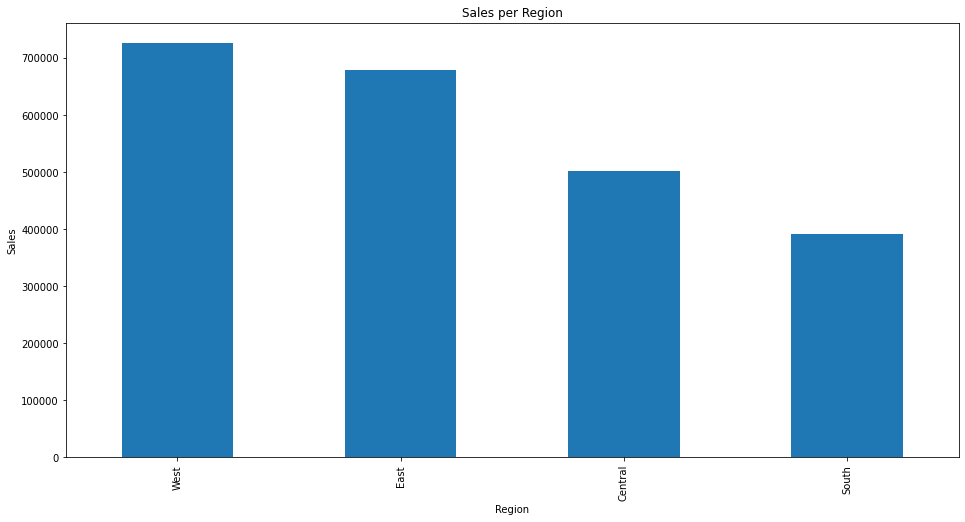

In [39]:
df5 = df.groupby('Region')['Sales'].sum().sort_values(ascending=False).plot(kind = 'bar', figsize=(16,8), 
                                                                            ylabel = 'Sales', title = 'Sales per Region')

In [20]:
# Quantity of sold products per region 

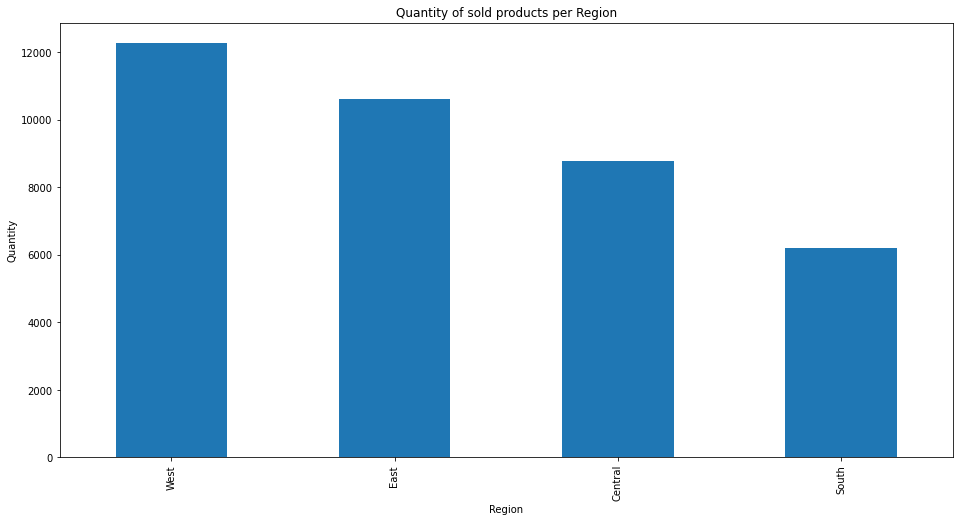

In [36]:
df5 = df.groupby('Region')['Quantity'].sum()
df5 = df5.sort_values(ascending=False)
df5.plot(kind = 'bar', figsize=(16,8), ylabel = 'Quantity', title = 'Quantity of sold products per Region');

In [ ]:
# Quantity and sub category 

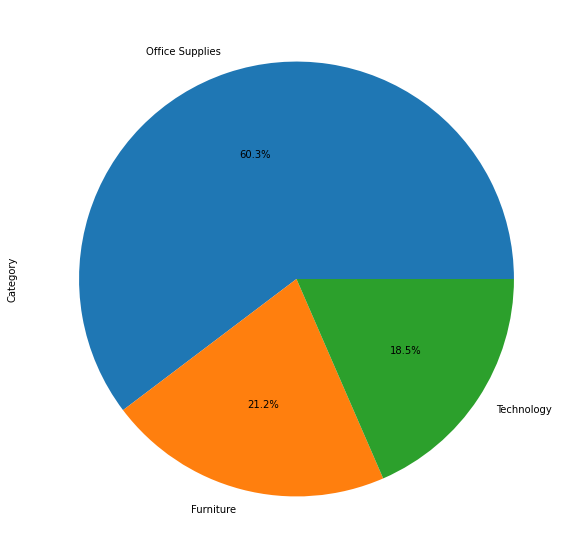

In [81]:
plt.figure(figsize=(12,10))
df['Category'].value_counts().plot.pie(autopct='%1.1f%%');

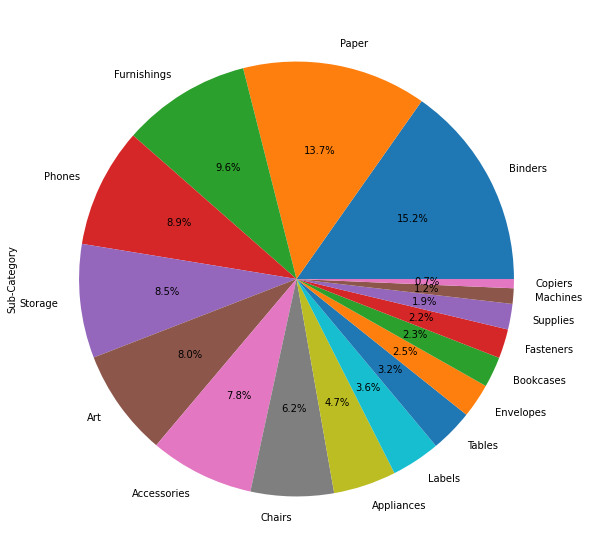

In [80]:
plt.figure(figsize=(12,10))
df['Sub-Category'].value_counts().plot.pie(autopct='%1.1f%%');

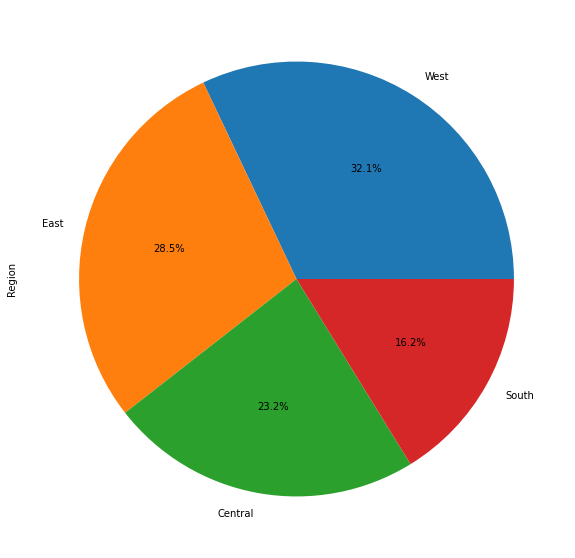

In [87]:
plt.figure(figsize=(12,10))

df['Region'].value_counts().plot.pie(autopct='%1.1f%%');

1850

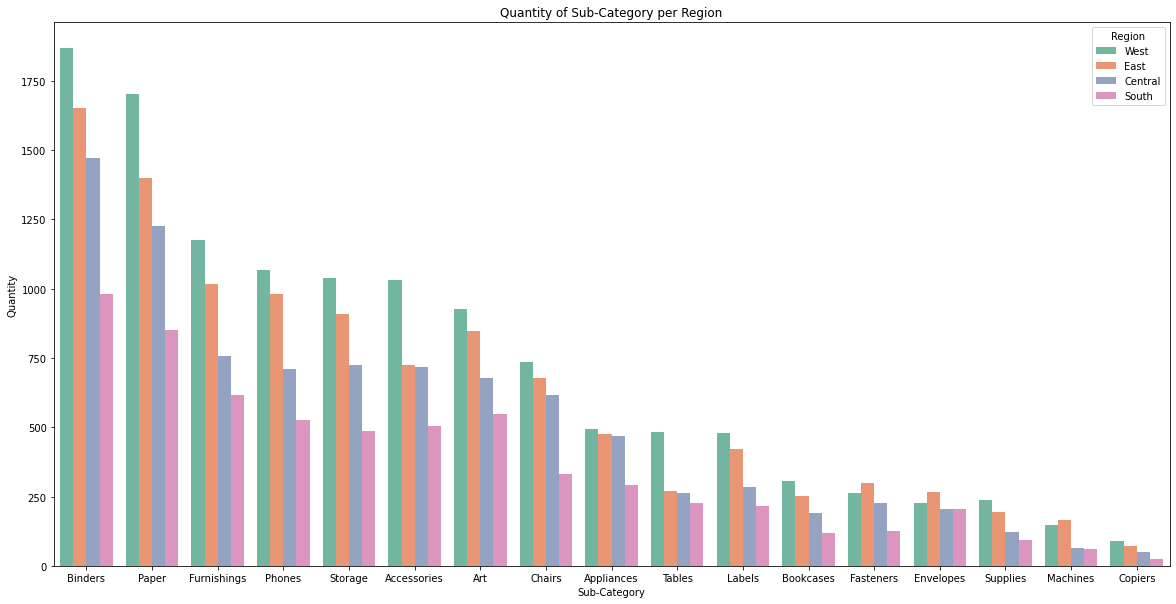

In [60]:
df3 = df.groupby(['Sub-Category','Region'], as_index=False)['Quantity'].sum()
df3 = df3.sort_values(by= 'Quantity', ascending=False)
plt.figure(figsize=(20,10))
fig = sns.barplot(data=df3, y='Quantity', x = 'Sub-Category', hue= 'Region', palette = 'Set2')
plt.title("Quantity of Sub-Category per Region");

In [ ]:
# Quantity & Product Name

In [37]:
df5

Region
West       12266
East       10616
Central     8776
South       6209
Name: Quantity, dtype: int64

In [42]:
west = df[(df['Region']=='West')] 
east = df[(df['Region']=='East')] 
central = df[(df['Region']=='Central')] 
south = df[(df['Region']=='South')] 

grouped_df = df.groupby('Product Name')['Quantity'].sum().reset_index()
grouped_west = west.groupby('Product Name')['Quantity'].sum().reset_index()
grouped_east = east.groupby('Product Name')['Quantity'].sum().reset_index()
grouped_central = central.groupby('Product Name')['Quantity'].sum().reset_index()
grouped_south = south.groupby('Product Name')['Quantity'].sum().reset_index()

l1 = list(grouped_df['Product Name'])
l2 = list(grouped_west['Product Name'])
l3 = list(grouped_east['Product Name'])
l4 = list(grouped_central['Product Name'])
l5 = list(grouped_south['Product Name'])

unsold_list_west = [x for x in l1 if x not in l2]
unsold_list_east = [x for x in l1 if x not in l3]
unsold_list_central = [x for x in l1 if x not in l4]
unsold_list_south = [x for x in l1 if x not in l5]

westlen =  len(unsold_list_west)
eastlen =  len(unsold_list_east)
centrallen =  len(unsold_list_central)
southlen =  len(unsold_list_south)



In [44]:
data = [['West', westlen], ['East', eastlen], ['Central', centrallen], ['South', southlen]]
df = pd.DataFrame(data, columns=['Region', 'Count'])
df

,Region,Count
0,West,347
1,East,435
2,Central,556
3,South,808


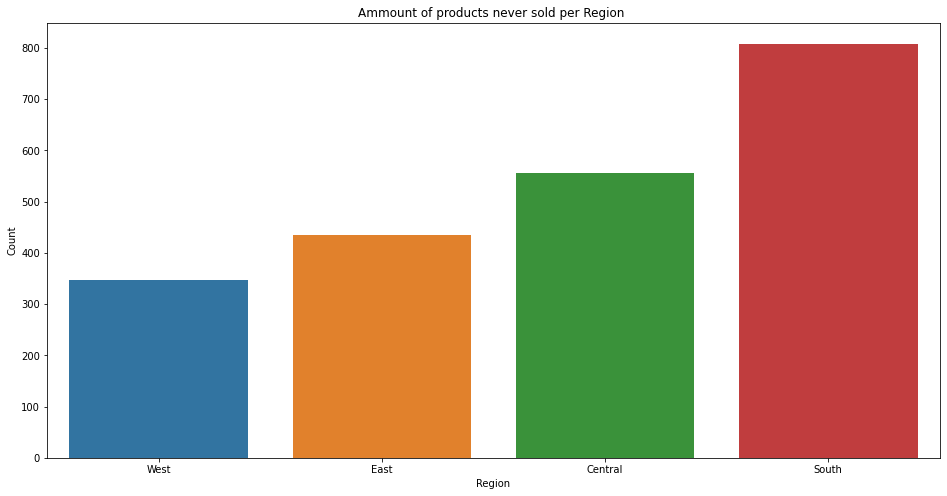

In [47]:
plt.figure(figsize=(16,8))
sns.barplot(data=df, x = 'Region', y = 'Count')
plt.title("Ammount of products never sold per Region ");

In [49]:
unsold_list_west

['#10 Gummed Flap White Envelopes, 100/Box',
 '#10-4 1/8" x 9 1/2" Premium Diagonal Seam Envelopes',
 '1.7 Cubic Foot Compact "Cube" Office Refrigerators',
 '1/4 Fold Party Design Invitations & White Envelopes, 24 8-1/2" X 11" Cards, 25 Env./Pack',
 '3D Systems Cube Printer, 2nd Generation, Magenta',
 '3M Organizer Strips',
 '3M Polarizing Task Lamp with Clamp Arm, Light Gray',
 '4009 Highlighters',
 'ARKON Windshield Dashboard Air Vent Car Mount Holder',
 'AT&T EL51110 DECT',
 'Acco 6 Outlet Guardian Basic Surge Suppressor',
 'Acco 6 Outlet Guardian Standard Surge Suppressor',
 'Acco Hot Clips Clips to Go',
 'Acme Serrated Blade Letter Opener',
 'Acme Stainless Steel Office Snips',
 'Adams Telephone Message Books, 5 1/4” x 11”',
 'Adams Write n\' Stick Phone Message Book, 11" X 5 1/4", 200 Messages',
 'Advantus 10-Drawer Portable Organizer, Chrome Metal Frame, Smoke Drawers',
 'Advantus Motivational Note Cards',
 'Ampad Poly Cover Wirebound Steno Book, 6" x 9" Assorted Colors, Gregg R

In [50]:
unsold_list_east

['"While you Were Out" Message Book, One Form per Page',
 '#10- 4 1/8" x 9 1/2" Security-Tint Envelopes',
 '14-7/8 x 11 Blue Bar Computer Printout Paper',
 '24 Capacity Maxi Data Binder Racks, Pearl',
 '3.6 Cubic Foot Counter Height Office Refrigerator',
 '3D Systems Cube Printer, 2nd Generation, White',
 '3M Office Air Cleaner',
 '3M Polarizing Light Filter Sleeves',
 '3M Polarizing Task Lamp with Clamp Arm, Light Gray',
 "3M Replacement Filter for Office Air Cleaner for 20' x 33' Room",
 'ACCOHIDE Binder by Acco',
 'APC 7 Outlet Network SurgeArrest Surge Protector',
 'AT&T 1070 Corded Phone',
 'AT&T 1080 Phone',
 'AT&T CL82213',
 'AT&T TR1909W',
 'Acco 6 Outlet Guardian Premium Plus Surge Suppressor',
 'Acco 6 Outlet Guardian Premium Surge Suppressor',
 'Acco 7-Outlet Masterpiece Power Center, Wihtout Fax/Phone Line Protection',
 'Acco Glide Clips',
 'Acco Side-Punched Conventional Columnar Pads',
 'Acco Smartsocket Color-Coded Six-Outlet AC Adapter Model Surge Protectors',
 'Acme De

In [51]:
unsold_list_south

['#10 Gummed Flap White Envelopes, 100/Box',
 '#10-4 1/8" x 9 1/2" Premium Diagonal Seam Envelopes',
 '#6 3/4 Gummed Flap White Envelopes',
 '1/4 Fold Party Design Invitations & White Envelopes, 24 8-1/2" X 11" Cards, 25 Env./Pack',
 '12 Colored Short Pencils',
 '36X48 HARDFLOOR CHAIRMAT',
 '3D Systems Cube Printer, 2nd Generation, Magenta',
 '3M Office Air Cleaner',
 "3M Replacement Filter for Office Air Cleaner for 20' x 33' Room",
 '4009 Highlighters',
 '6" Cubicle Wall Clock, Black',
 'AT&T 1080 Phone',
 'AT&T 841000 Phone',
 'AT&T EL51110 DECT',
 'AT&T SB67148 SynJ',
 'Aastra 6757i CT Wireless VoIP phone',
 'Acco 3-Hole Punch',
 'Acco 6 Outlet Guardian Basic Surge Suppressor',
 'Acco 6 Outlet Guardian Premium Plus Surge Suppressor',
 'Acco Data Flex Cable Posts For Top & Bottom Load Binders, 6" Capacity',
 'Acco Economy Flexible Poly Round Ring Binder',
 'Acco Expandable Hanging Binders',
 'Acco Four Pocket Poly Ring Binder with Label Holder, Smoke, 1"',
 'Acco Glide Clips',
 'Acc

In [52]:
unsold_list_central

['#10 Self-Seal White Envelopes',
 '1/4 Fold Party Design Invitations & White Envelopes, 24 8-1/2" X 11" Cards, 25 Env./Pack',
 '2300 Heavy-Duty Transfer File Systems by Perma',
 '24-Hour Round Wall Clock',
 '3-ring staple pack',
 '3D Systems Cube Printer, 2nd Generation, Magenta',
 '3D Systems Cube Printer, 2nd Generation, White',
 '4009 Highlighters',
 '9-3/4 Diameter Round Wall Clock',
 'AT&T 1070 Corded Phone',
 'AT&T CL2909',
 'AT&T EL51110 DECT',
 'AT&T SB67148 SynJ',
 'AT&T TR1909W',
 'Acco Glide Clips',
 'Acco PRESSTEX Data Binder with Storage Hooks, Dark Blue, 14 7/8" X 11"',
 'Acco PRESSTEX Data Binder with Storage Hooks, Light Blue, 9 1/2" X 11"',
 'Acco Pressboard Covers with Storage Hooks, 14 7/8" x 11", Dark Blue',
 'Acme Design Line 8" Stainless Steel Bent Scissors w/Champagne Handles, 3-1/8" Cut',
 'Acme Design Stainless Steel Bent Scissors',
 'Acme Galleria Hot Forged Steel Scissors with Colored Handles',
 'Acme Kleen Earth Office Shears',
 'Acme Kleencut Forged Steel 

In [ ]:
# Profit per Region 

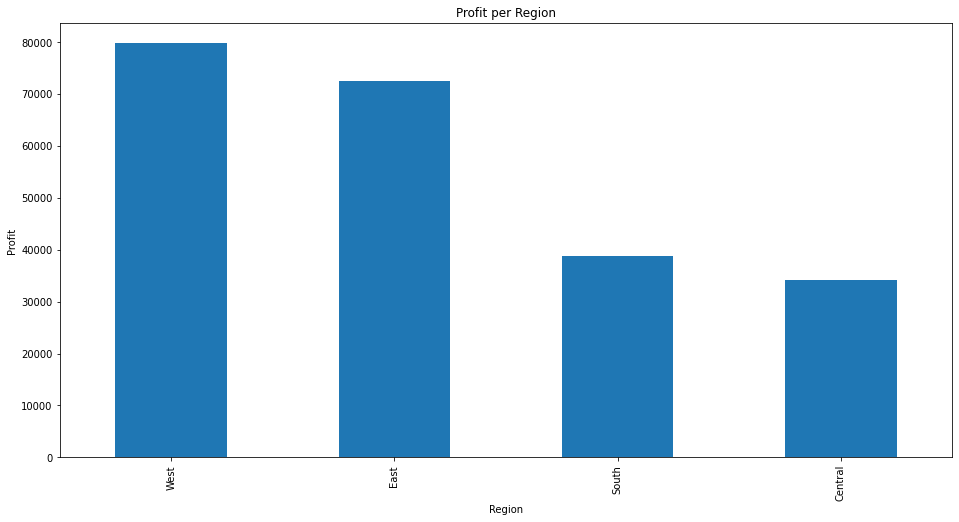

In [25]:
df8 = df.groupby('Region')['Profit'].sum() 
df8 = df8.sort_values(ascending=False)
df8.plot(kind = 'bar', figsize=(16,8), ylabel = 'Profit', title = 'Profit per Region');

In [56]:
lost =  df[(df['Sub-Category']=='Machines' ) | (df['Sub-Category']=='Tables' )
                     | (df['Sub-Category']=='Bookcases' )  | (df['Sub-Category']=='Appliances' )
                    | (df['Sub-Category']=='Supplies' )
                     | (df['Sub-Category']=='Furnishings' )]

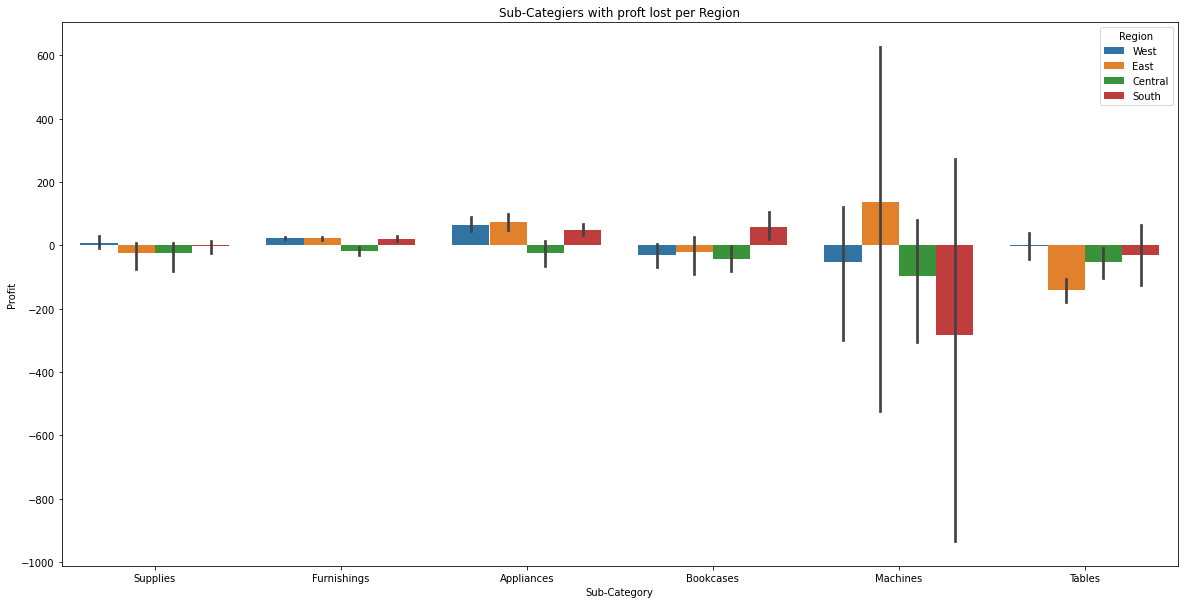

In [61]:
plt.figure(figsize=(20,10))

fig = sns.barplot(data=lost, x = 'Sub-Category', y = 'Profit', hue = 'Region')
plt.title("Sub-Categiers with proft lost per Region");

In [76]:
df11 = df.query ('Profit < 0') 
df11

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1996,US-2015-108966,2015-10-11,Standard Class,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2007,US-2015-118983,2015-11-22,Standard Class,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580
2008,US-2015-118983,2015-11-22,Standard Class,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160
2016,US-2017-156909,2017-07-16,Second Class,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
2020,US-2015-150630,2015-09-17,Standard Class,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522
...,...,...,...,...,...,...,...,...,...,...,...,...
9968,US-2015-126753,2015-08-16,Standard Class,East,OFF-BI-10003727,Office Supplies,Binders,Avery Durable Slant Ring Binders With Label Ho...,3.7620,3,0.70,-2.7588
9984,CA-2016-133872,2016-06-14,First Class,South,OFF-BI-10002082,Office Supplies,Binders,GBC Twin Loop Wire Binding Elements,39.9360,4,0.70,-26.6240
9986,US-2015-165743,2015-11-20,Second Class,West,OFF-BI-10001982,Office Supplies,Binders,Wilson Jones Custom Binder Spines & Labels,4.8960,3,0.70,-3.4272
9987,US-2015-165743,2015-11-20,Second Class,West,FUR-BO-10002268,Furniture,Bookcases,Sauder Barrister Bookcases,145.7640,6,0.70,-247.7988


In [77]:
west = df11[(df11['Region']=='West')] 
east = df11[(df11['Region']=='East')] 
central = df11[(df11['Region']=='Central')] 
south = df11[(df11['Region']=='South')] 

grouped_df = df11.groupby('Product Name')['Quantity'].sum().reset_index()
grouped_west = west.groupby('Product Name')['Quantity'].sum().reset_index()
grouped_east = east.groupby('Product Name')['Quantity'].sum().reset_index()
grouped_central = central.groupby('Product Name')['Quantity'].sum().reset_index()
grouped_south = south.groupby('Product Name')['Quantity'].sum().reset_index()

l1 = list(grouped_df['Product Name'])
l2 = list(grouped_west['Product Name'])
l3 = list(grouped_east['Product Name'])
l4 = list(grouped_central['Product Name'])
l5 = list(grouped_south['Product Name'])

lost_profit_list_west = [x for x in l1 if x not in l2]
lost_profit_list_east = [x for x in l1 if x not in l3]
lost_profit_list_central = [x for x in l1 if x not in l4]
lost_profit_list_south = [x for x in l1 if x not in l5]

westlen =  len(lost_profit_list_west)
eastlen =  len(lost_profit_list_east)
centrallen =  len(lost_profit_list_central)
southlen =  len(lost_profit_south)


In [78]:
data = [['West', westlen], ['East', eastlen], ['Central', centrallen], ['South', southlen]]
lost_profit = pd.DataFrame(data, columns=['Region', 'Count'])
lost_profit

,Region,Count
0,West,501
1,East,365
2,Central,295
3,South,535


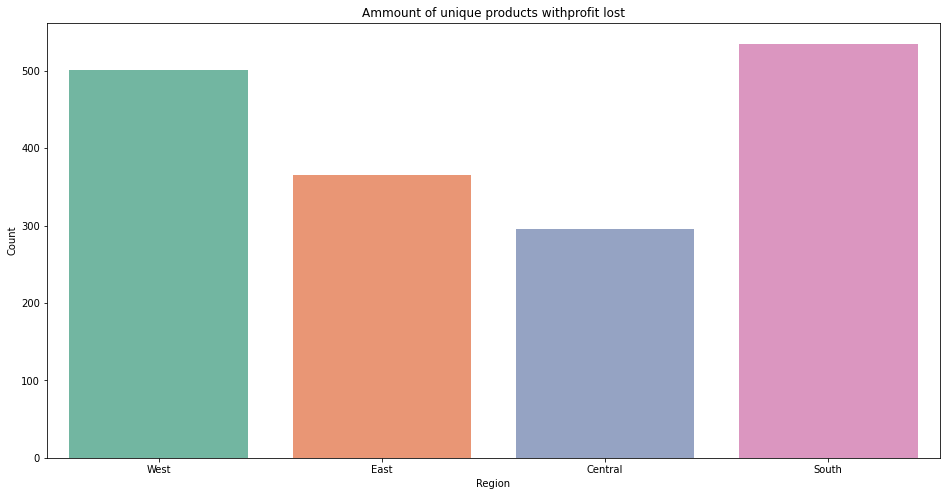

In [79]:
plt.figure(figsize=(16,8))
sns.barplot(data=lost_profit, x = 'Region', y = 'Count', palette= 'Set2')
plt.title("Ammount of unique products withprofit lost");

In [72]:
lost_profit_list_west

['12-1/2 Diameter Round Wall Clock',
 '3.6 Cubic Foot Counter Height Office Refrigerator',
 '36X48 HARDFLOOR CHAIRMAT',
 '3D Systems Cube Printer, 2nd Generation, White',
 '3M Hangers With Command Adhesive',
 '3M Organizer Strips',
 '3M Polarizing Light Filter Sleeves',
 "3M Replacement Filter for Office Air Cleaner for 20' x 33' Room",
 '6" Cubicle Wall Clock, Black',
 'ACCOHIDE 3-Ring Binder, Blue, 1"',
 'ACCOHIDE Binder by Acco',
 'APC 7 Outlet Network SurgeArrest Surge Protector',
 'ARKON Windshield Dashboard Air Vent Car Mount Holder',
 'AT&T 1080 Corded phone',
 'AT&T 17929 Lendline Telephone',
 'AT&T 841000 Phone',
 'Aastra 57i VoIP phone',
 'Aastra 6757i CT Wireless VoIP phone',
 'Acco 3-Hole Punch',
 'Acco 6 Outlet Guardian Premium Plus Surge Suppressor',
 'Acco 7-Outlet Masterpiece Power Center, Wihtout Fax/Phone Line Protection',
 'Acco D-Ring Binder w/DublLock',
 'Acco Economy Flexible Poly Round Ring Binder',
 'Acco Four Pocket Poly Ring Binder with Label Holder, Smoke, 1"

In [73]:
lost_profit_list_east

['12-1/2 Diameter Round Wall Clock',
 '2300 Heavy-Duty Transfer File Systems by Perma',
 '3.6 Cubic Foot Counter Height Office Refrigerator',
 '3D Systems Cube Printer, 2nd Generation, White',
 '3M Hangers With Command Adhesive',
 '3M Polarizing Light Filter Sleeves',
 "3M Replacement Filter for Office Air Cleaner for 20' x 33' Room",
 '6" Cubicle Wall Clock, Black',
 'ACCOHIDE Binder by Acco',
 'APC 7 Outlet Network SurgeArrest Surge Protector',
 'ARKON Windshield Dashboard Air Vent Car Mount Holder',
 'Acco 6 Outlet Guardian Premium Plus Surge Suppressor',
 'Acco 7-Outlet Masterpiece Power Center, Wihtout Fax/Phone Line Protection',
 'Acco Expandable Hanging Binders',
 'Acco Flexible ACCOHIDE Square Ring Data Binder, Dark Blue, 11 1/2" X 14" 7/8"',
 'Acco Four Pocket Poly Ring Binder with Label Holder, Smoke, 1"',
 'Acco Perma 3000 Stacking Storage Drawers',
 'Acco Recycled 2" Capacity Laser Printer Hanging Data Binders',
 'Acco Side-Punched Conventional Columnar Pads',
 'Acco Smarts

In [74]:
lost_profit_list_central

['2300 Heavy-Duty Transfer File Systems by Perma',
 '3D Systems Cube Printer, 2nd Generation, White',
 '3M Organizer Strips',
 'ACCOHIDE 3-Ring Binder, Blue, 1"',
 'ACCOHIDE Binder by Acco',
 'AT&T 1080 Corded phone',
 'AT&T 17929 Lendline Telephone',
 'AT&T 841000 Phone',
 'Aastra 57i VoIP phone',
 'Aastra 6757i CT Wireless VoIP phone',
 'Acco Economy Flexible Poly Round Ring Binder',
 'Acco Expandable Hanging Binders',
 'Acco PRESSTEX Data Binder with Storage Hooks, Dark Blue, 9 1/2" X 11"',
 'Acco Pressboard Covers with Storage Hooks, 14 7/8" x 11", Executive Red',
 'Acco Translucent Poly Ring Binders',
 'Acme Rosewood Handle Letter Opener',
 'Alliance Super-Size Bands, Assorted Sizes',
 'Anderson Hickey Conga Table Tops & Accessories',
 'Angle-D Ring Binders',
 'Anker 36W 4-Port USB Wall Charger Travel Power Adapter for iPhone 5s 5c 5',
 'Anker Astro 15000mAh USB Portable Charger',
 'Anker Astro Mini 3000mAh Ultra-Compact Portable Charger',
 'Anker Ultrathin Bluetooth Wireless Keyb

In [75]:
lost_profit_list_south

['12-1/2 Diameter Round Wall Clock',
 '3.6 Cubic Foot Counter Height Office Refrigerator',
 '36X48 HARDFLOOR CHAIRMAT',
 '3M Hangers With Command Adhesive',
 '3M Organizer Strips',
 '3M Polarizing Light Filter Sleeves',
 "3M Replacement Filter for Office Air Cleaner for 20' x 33' Room",
 '6" Cubicle Wall Clock, Black',
 'ACCOHIDE 3-Ring Binder, Blue, 1"',
 'APC 7 Outlet Network SurgeArrest Surge Protector',
 'AT&T 1080 Corded phone',
 'AT&T 17929 Lendline Telephone',
 'AT&T 841000 Phone',
 'Aastra 57i VoIP phone',
 'Aastra 6757i CT Wireless VoIP phone',
 'Acco 3-Hole Punch',
 'Acco 6 Outlet Guardian Premium Plus Surge Suppressor',
 'Acco 7-Outlet Masterpiece Power Center, Wihtout Fax/Phone Line Protection',
 'Acco Economy Flexible Poly Round Ring Binder',
 'Acco Expandable Hanging Binders',
 'Acco Flexible ACCOHIDE Square Ring Data Binder, Dark Blue, 11 1/2" X 14" 7/8"',
 'Acco Four Pocket Poly Ring Binder with Label Holder, Smoke, 1"',
 'Acco Hanging Data Binders',
 'Acco PRESSTEX Dat

In [ ]:
# mozna z tego zaobserwować że ilość jest rózna sprzedazy 

In [66]:
eastlen

365